In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.max_columns = 1000

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df.Class.value_counts() / len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Accuracy: train: 0.999207, test: 0.999157


(<matplotlib.figure.Figure at 0x1a1124a860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a112655c0>)

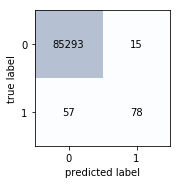

In [8]:
target = "Class"
y = df[target]
X = df.loc[:, "V1": "V28"]
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

precision 0.8387096774193549 recall 0.5777777777777777


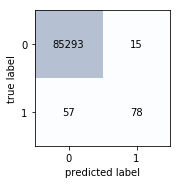

In [9]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred),
     "recall", metrics.recall_score(y_test, y_test_pred))